In [7]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
base_atmospheric_pressure = 101325


def calculate_buoyancy(V, density_fluid):
    """Calculate buoyant force.

    V -- volume of fluid |
    density_fluid -- density of fluid
    """
    if V <= 0 or density_fluid <= 0:
        raise ValueError("Volume or density cannot be <= 0.")
    buoyant_force = density_fluid * V * g
    return buoyant_force


def will_it_float(V, mass):
    """Checks whether object with given mass floating in a fluid of given volume (by Archimedes' principle) will float.
    V -- volume of object |
    mass -- mass of object
    """
    if V <= 0 or mass <= 0:
        raise ValueError("Volume or mass cannot be <= 0.")
    buoyant_force = V * 1000 * g
    weight = mass * g
    return buoyant_force > weight


def calculate_pressure(depth):
    """Calculates pressure at given depth.

    depth -- depth of object in water
    """
    if depth <= 0:
        raise ValueError("Depth must be positive value.")
    pressure = 1000 * g * depth + base_atmospheric_pressure
    return pressure


def calculate_acceleration(F, mass):
    """
    Calculates acceleration given force and mass.

    F - force applied on object |
    mass - mass of object
    """
    if mass <= 0:
        raise ValueError("Mass must be positive.")
    acceleration = F / mass
    return acceleration


def calculate_angular_acceleration(tau, I):
    """
    Calculates angular acceleration given torque and moment of inertia.

    tau - torque applied on object |
    I - moment of inertia of object
    """
    if I <= 0:
        raise ValueError("Moment of inertia must be positive.")
    angular_acceleration = tau / I
    return angular_acceleration


def calculate_torque(F_magnitude, F_direction, r):
    """
    Calculates torque given magnitude and direction of force and distance from center of mass .

    F_magnitude - magnitude of force applied on object |
    F_direction - direction of force applied on object |
    r - distance of force applied from center of mass
    """
    if F_magnitude < 0 or r < 0:
        raise ValueError(
            "Magnitude of force and distance to center of mass must be positive"
        )
    torque = F_magnitude * np.sin(np.radians(F_direction)) * r
    return torque


def calculate_moment_of_inertia(m, r):
    """
    Calculates moment of inertia given mass and distance from axis of rotation to center of mass.

    m - mass of object |
    r - distance from axis of rotation to center of mass
    """
    if m <= 0 or r < 0:
        raise ValueError(
            "Mass must be positive and distance to center of mass must be nonnegative."
        )
    moment_of_inertia = m * pow(r, 2)
    return moment_of_inertia


def calculate_auv_acceleration(
    F_magnitude, F_angle, mass=100, volume=0.1, thruster_distance=0.5
):
    """
    Calculates acceleration of AUV given magnitude of force exerted by thruster and mass of AUV.

    F_magnitude - Magnitude of force exerted by thruster |
    F_angle - Angle of force applied by the thruster in degrees
    mass - (optional), mass of the AUV |
    volume - (optional), volume of the AUV |
    thruster_distance - (optional), distance of thruster from center of mass of AUV

    """
    if F_magnitude < 0 or mass <= 0:
        raise ValueError(
            "Magnitude of force must be positive and mass must be positive."
        )
    auv_acceleration = np.array(
        [
            F_magnitude * np.cos(np.radians(F_angle)) / mass,
            F_magnitude * np.sin(np.radians(F_angle)) / mass,
        ],
        dtype=float,
    )
    return auv_acceleration


def calculate_auv_angular_acceleration(
    F_magnitude, F_angle, inertia=1, thruster_distance=0.5
):
    """
    Calculates angular acceleration of AUV given magnitude of force exerted by thruster and angle of force respective to center of mass.

    F_magnitude - Magnitude of force exerted by thruster |
    F_angle - Angle of thruster exerting force on AUV |
    inertia - (optional), moment of inertia of AUV |
    thruster_distance (optional), distance of thruster from center of mass from AUV
    """
    if F_magnitude < 0:
        raise ValueError("Magnitude of force must be positive.")
    torque = F_magnitude * np.sin(np.radians(F_angle)) * thruster_distance
    auv_angular_acceleration = calculate_angular_acceleration(torque, inertia)
    return auv_angular_acceleration


def calculate_auv2_acceleration(T, alpha, theta, mass=100):
    """
    Calculates linear acceleration of AUV given magnitude of force exerted by all 4 thrusters, their angles, and mass of AUV.

    T - Forces exerted by each of the 4 thrusters
    alpha - Angle of each thruster |
    theta - Rotation of AUV |
    mass - Mass of AUV
    """
    if len(T) != 4:
        raise ValueError("Must be exactly 4 thrusters present.")
    if mass <= 0:
        raise ValueError("Mass must be positive.")
    cos_angle = np.cos(alpha)
    sin_angle = np.sin(alpha)
    signs_matrix = np.array(
        [
            cos_angle,
            cos_angle,
            -cos_angle,
            -cos_angle,
            sin_angle,
            -sin_angle,
            -sin_angle,
            sin_angle,
        ],
    ).reshape(2, 4)
    forces_matrix = np.dot(signs_matrix, T)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([cos_theta, -sin_theta, sin_theta, cos_theta]).reshape(
        2, 2
    )

    acceleration_matrix = np.dot(rotation_matrix, forces_matrix) / mass

    return acceleration_matrix


def calculate_auv2_angular_acceleration(T, alpha, L, l, inertia=100):
    """
    Calculates angular acceleration of AUV given magnitude of force exerted by thrusters, angle of thrusters, and dimensions of AUV.

    T - Magnitude of force exerted by thruster |
    alpha - angle of thruster with respect to x-axis |
    L - half of the length of the AUV |
    l - half of the width of the AUV |
    inertia - (optional), moment of inertia of AUV
    """
    if len(T) != 4:
        raise ValueError("Must be exactly 4 thrusters present.")
    if inertia <= 0:
        raise ValueError("Moment of inertia must be positive.")
    if L <= 0 or l <= 0:
        raise ValueError("Dimensions of AUV must be positive")

    sin_angle = np.sin(alpha)
    cos_angle = np.cos(alpha)

    T = np.array([T])
    net_torque = np.sum(
        np.dot(T, np.array([[1, -1, 1, -1]]).T) * (sin_angle * L + cos_angle * l)
    )
    # for i in range(4):
    #     sin_angle = np.sin(alpha)
    #     cos_angle = np.cos(alpha)
    #     if i % 2 == 0:
    #         net_torque += T[i] * (sin_angle * L + cos_angle * l)
    #     else:
    #         net_torque -= T[i] * (sin_angle * L + cos_angle * l)

    angular_acceleration = calculate_angular_acceleration(net_torque, inertia)
    return angular_acceleration









In [8]:
def simulate_auv2_motion(
    T, alpha, L, l, mass=100, inertia=100, dt=0.1, t_final=10, x0=0, y0=0, theta0=0
) -> tuple:
    """
    Simulates the motion of the AUV in a 2D plane.

    Arguments:
    T: an np.ndarray of the magnitudes of the forces applied by the thrusters in Newtons.
    alpha: the angle of the thrusters in radians.
    L: the distance from the center of mass of the AUV to the thrusters in meters.
    l: the distance from the center of mass of the AUV to the thrusters in meters.
    inertia (optional): the moment of inertia of the AUV
    dt (optional): the time step of the simulation in seconds.
    t_final (optional): the final time of the simulation in seconds
    x0 (optional): the initial x-position of the AUV in meters.
    y0 (optional): the initial y-position of the AUV in meters.
    theta0 (optional): the initial angle of the AUV in radians
    """
    if len(T) != 4:
        raise ValueError("Must be exactly 4 thrusters present.")
    if L <= 0 or l <= 0:
        raise ValueError("Dimensions must be positive.")
    t = np.arange(0, t_final, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    v_x = np.zeros_like(t)
    v_y = np.zeros_like(t)
    a_x = np.zeros_like(t)
    a_y = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta = np.zeros_like(t)

    x[0] = x0
    y[0] = y0

    theta[0] = theta0

    a_x[0] = calculate_auv2_acceleration(T, alpha, theta0)[0]
    a_y[0] = calculate_auv2_acceleration(T, alpha, theta0)[1]

    for i in range(1, len(t)):
        omega[i] = (
            calculate_auv2_angular_acceleration(T, alpha, L, l, inertia)
        ) * dt + omega[i - 1]

        theta[i] = theta[i - 1] + omega[i] * dt

        a_x[i] = calculate_auv2_acceleration(T, alpha, theta[i])[0]
        a_y[i] = calculate_auv2_acceleration(T, alpha, theta[i])[1]

        v_x[i] = a_x[i] * dt + v_x[i - 1]
        v_y[i] = a_y[i] * dt + v_y[i - 1]

        x[i] = v_x[i] * dt + x[i - 1]
        y[i] = v_y[i] * dt + y[i - 1]

    v = []
    a = []
    for i in range(len(t)):
        v.append([v_x[i], v_y[i]])
        a.append([a_x[i], a_y[i]])

    # print(t)
    # print(x)
    # print(y)
    # print(theta)
    # print(v_x)
    # print(v_y)
    # print(v)
    # print(omega)
    # print(a_x)
    # print(a_y)
    # print(a)
    return (t, x, y, theta, v, omega, a)

In [9]:
def plot_auv2_motion(auv_motion):
    plt.plot(auv_motion[0], auv_motion[1], label="X-Position")
    plt.plot(auv_motion[0], auv_motion[2], label="Y-Position")
    # plt.plot(auv_motion[0], auv_motion[3], label="Theta")
    plt.show()

In [10]:
def plot_auv2_motion_3d(auv_motion):
    ax = plt.axes(projection='3d')
    ax.plot3D(auv_motion[0], auv_motion[1], auv_motion[2])

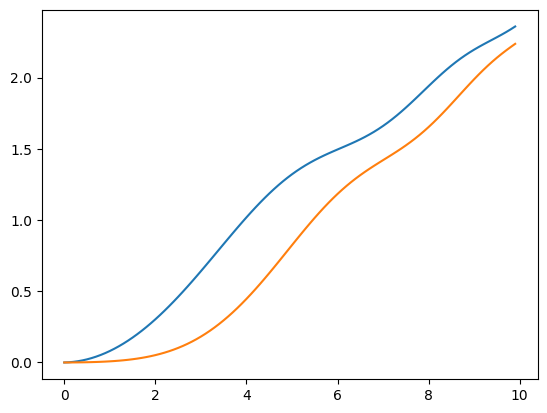

In [11]:
# plot_auv2_motion(simulate_auv2_motion([40,60,80,100], np.pi/3, 3, 2))
plot_auv2_motion(simulate_auv2_motion([50,30,40,25], 0.2, 1, 0.5))